# Covid-19 현황분석

In [1]:
import requests
from urllib.parse import urlparse,quote
import pandas as pd
from bs4 import BeautifulSoup

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
import matplotlib as mpl 

In [3]:
key_fd = open('./keys/covid19apikey.txt', mode='r')
govapi_key = key_fd.read(100)
key_fd.close()

### 하루 지정해서 데이터 파악하기

In [4]:
start_date = '20201123'
end_date = '20201123'
page = 1

In [5]:
corona_url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson'
url = f'{corona_url}?ServiceKey={govapi_key}&pageNo={page}&numOfRows=10&startCreateDt={start_date}&endCreateDt={end_date}'

In [6]:
result = requests.get(url)
soup = BeautifulSoup(result.text,'xml')
soup

<?xml version="1.0" encoding="utf-8"?>
<response><header><resultCode>00</resultCode><resultMsg>NORMAL SERVICE.</resultMsg></header><body><items><item><createDt>2020-11-23 09:33:42.566</createDt><deathCnt>0</deathCnt><defCnt>2115</defCnt><gubun>검역</gubun><gubunCn>隔離區</gubunCn><gubunEn>Lazaretto</gubunEn><incDec>5</incDec><isolClearCnt>1563</isolClearCnt><isolIngCnt>552</isolIngCnt><localOccCnt>0</localOccCnt><overFlowCnt>5</overFlowCnt><qurRate>-</qurRate><seq>5840</seq><stdDay>2020년 11월 23일 00시</stdDay><updateDt>null</updateDt></item><item><createDt>2020-11-23 09:33:42.566</createDt><deathCnt>0</deathCnt><defCnt>66</defCnt><gubun>제주</gubun><gubunCn>济州</gubunCn><gubunEn>Jeju</gubunEn><incDec>1</incDec><isolClearCnt>59</isolClearCnt><isolIngCnt>7</isolIngCnt><localOccCnt>1</localOccCnt><overFlowCnt>0</overFlowCnt><qurRate>9.84</qurRate><seq>5839</seq><stdDay>2020년 11월 23일 00시</stdDay><updateDt>null</updateDt></item><item><createDt>2020-11-23 09:33:42.566</createDt><deathCnt>1</deathCnt><

In [23]:
items = soup.find_all('item')
len(items)

0

In [24]:
items[2]

IndexError: list index out of range

In [8]:
# 지역명 인덱스 2부터 -3까지임
items[2].find('gubun').get_text(),items[-3].find('gubun').get_text()

('경남', '부산')

In [9]:
# 전일대비 확진자 수 
items[2].find('incDec').get_text(),items[-3].find('incDec').get_text()

('2', '5')

In [10]:
# 11월 30일 모든 지역 뽑아보기
tmp_list1=[];tmp_list2=[];
for i in range(2,18):
    tmp_list1.append(items[i].find('gubun').get_text())
    tmp_list2.append(items[i].find('incDec').get_text())
df_tmp = pd.DataFrame({'지역':tmp_list1,'확진자수':tmp_list2})
df_tmp

,지역,확진자수
0,경남,2
1,경북,4
2,전남,5
3,전북,9
4,충남,9
5,충북,0
6,강원,12
7,경기,76
8,세종,1
9,울산,1


### 일주일 반복 돌려보기

In [11]:
import datetime

# The size of each step in days
day_delta = datetime.timedelta(days=1)
a1 = '2020-11-01'
start_date = datetime.datetime.strptime(a1, '%Y-%m-%d')

end_date = start_date + 7*day_delta

for i in range((end_date - start_date).days):
    print(start_date + i*day_delta,type(start_date + i*day_delta))

2020-11-01 00:00:00 <class 'datetime.datetime'>
2020-11-02 00:00:00 <class 'datetime.datetime'>
2020-11-03 00:00:00 <class 'datetime.datetime'>
2020-11-04 00:00:00 <class 'datetime.datetime'>
2020-11-05 00:00:00 <class 'datetime.datetime'>
2020-11-06 00:00:00 <class 'datetime.datetime'>
2020-11-07 00:00:00 <class 'datetime.datetime'>


In [12]:
dict_list=[]
day_delta = datetime.timedelta(days=1)
a1 = '2020-11-23'
start = datetime.datetime.strptime(a1, '%Y-%m-%d')
end = start + 7*day_delta
for i in range((end - start).days):
    date = (start + i*day_delta)
    raw_dict = {'날짜': date,'제주':0, '경남':0,'경북':0,'전남':0,'전북':0,'충남':0,'충북':0,'강원':0,'경기':0,'세종':0,'울산':0,'대전':0,'광주':0,'인천':0,'대구':0,'부산':0,'서울':0}
    start_date = date.strftime('%Y%m%d')
    end_date = date.strftime('%Y%m%d')
    page = 1
    corona_url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson'
    url = f'{corona_url}?ServiceKey={govapi_key}&pageNo={page}&numOfRows=10&startCreateDt={start_date}&endCreateDt={end_date}'
    result = requests.get(url)
    soup = BeautifulSoup(result.text,'xml')
    items = soup.find_all('item')
    for k in range(18):
        raw_dict[items[k].find('gubun').get_text()] = items[k].find('incDec').get_text()
    dict_list.append(raw_dict)
df = pd.DataFrame(dict_list)
df

,날짜,제주,경남,경북,전남,전북,충남,충북,강원,경기,세종,울산,대전,광주,인천,대구,부산,서울,검역
0,2020-11-23,1,2,4,5,9,9,0,12,76,1,1,3,1,23,2,5,112,5
1,2020-11-24,1,3,9,7,15,8,3,46,81,2,2,0,3,17,3,6,133,10
2,2020-11-25,3,11,3,8,8,18,3,13,82,0,3,4,14,40,5,18,142,7
3,2020-11-26,3,45,2,9,16,16,8,8,183,4,7,1,14,19,1,22,213,12
4,2020-11-27,3,39,3,11,24,31,20,9,117,3,7,5,13,25,0,24,204,31
5,2020-11-28,2,14,5,7,9,17,24,33,126,0,3,13,16,25,1,28,178,3
6,2020-11-29,1,15,11,20,17,13,22,19,94,3,0,6,8,21,3,22,158,17


### 2020년 데이터 모아보기

In [13]:
from tqdm import tqdm_notebook

In [30]:
# 1page만 해보기
dict_list=[]
day_delta = datetime.timedelta(days=1)
a1 = '2020-03-01'
b1 = '2020-11-30'
start = datetime.datetime.strptime(a1, '%Y-%m-%d')
end = datetime.datetime.strptime(b1, '%Y-%m-%d')
for i in tqdm_notebook(range((end - start).days)):
    date = (start + i*day_delta)
    raw_dict = {'날짜': date,'제주':0, '경남':0,'경북':0,'전남':0,'전북':0,'충남':0,'충북':0,'강원':0,'경기':0,'세종':0,'울산':0,'대전':0,'광주':0,'인천':0,'대구':0,'부산':0,'서울':0}
    start_date = date.strftime('%Y%m%d')
    end_date = date.strftime('%Y%m%d')
    page = 1
    corona_url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson'
    url = f'{corona_url}?ServiceKey={govapi_key}&pageNo={page}&numOfRows=10&startCreateDt={start_date}&endCreateDt={end_date}'
    result = requests.get(url)
    soup = BeautifulSoup(result.text,'xml')
    items = soup.find_all('item')
    for k in range(len(items)):
        raw_dict[items[k].find('gubun').get_text()] = items[k].find('incDec').get_text()
    dict_list.append(raw_dict)
df_corona = pd.DataFrame(dict_list)
df_corona

,날짜,제주,경남,경북,전남,전북,충남,충북,강원,경기,세종,울산,대전,광주,인천,대구,부산,서울,검역,합계
0,2020-03-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
1,2020-03-02,0,4,67,0,1,13,1,8,7,0,3,0,0,0,469,3,10,0,586
2,2020-03-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
3,2020-03-04,0,1,89,0,0,1,0,1,7,0,3,1,2,2,405,3,1,NaN,516
4,2020-03-05,1,9,87,-1,0,4,1,2,9,0,0,1,1,0,321,-1,4,NaN,438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,2020-11-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
270,2020-11-26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
271,2020-11-27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
272,2020-11-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN


In [31]:
# 필요없는 검역 지우고 NaN 처리하기
del df_corona['검역']
df_corona.fillna(0,inplace=True)

In [32]:
df_corona['날짜'] = pd.to_datetime(df_corona['날짜'])

In [ ]:
df_corona.to_csv('전국 코로나 현황.csv',sep=',',encoding='utf8')

In [33]:
df_corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      274 non-null    datetime64[ns]
 1   제주      274 non-null    object        
 2   경남      274 non-null    object        
 3   경북      274 non-null    object        
 4   전남      274 non-null    object        
 5   전북      274 non-null    object        
 6   충남      274 non-null    object        
 7   충북      274 non-null    object        
 8   강원      274 non-null    object        
 9   경기      274 non-null    object        
 10  세종      274 non-null    object        
 11  울산      274 non-null    object        
 12  대전      274 non-null    object        
 13  광주      274 non-null    object        
 14  인천      274 non-null    object        
 15  대구      274 non-null    object        
 16  부산      274 non-null    object        
 17  서울      274 non-null    object        
 18  합계      27

In [35]:
df_corona.set_index('날짜',inplace=True)

In [63]:
type(df_corona['제주'][0])

int

In [39]:
monthly_corona = df_corona.resample(rule='1M').sum()

## 누적횟수로 고장나서 교수님 데이터로 해보기

In [107]:
df1 = pd.read_csv('./data/전국코로나일별.csv')
df1

,date,서울,부산,대구,인천,대전,광주,울산,세종,경기,강원,충북,충남,경북,경남,전북,전남,제주,합계
0,2020-03-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-03-02,10,3,469,0,0,0,3,0,7,8,1,13,67,4,1,0,0,586
2,2020-03-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-03-04,1,3,405,2,1,2,3,0,7,1,0,1,89,1,0,0,0,516
4,2020-03-05,4,-1,321,0,1,1,0,0,9,2,1,4,87,9,0,-1,1,438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,2020-11-26,213,22,1,19,1,14,7,4,183,8,8,16,2,45,16,9,3,571
271,2020-11-27,204,24,0,25,5,13,7,3,117,9,20,31,3,39,24,11,3,538
272,2020-11-28,178,28,1,25,13,16,3,0,126,33,24,17,5,14,9,7,2,501
273,2020-11-29,158,22,3,21,6,8,0,3,94,19,22,13,11,15,17,20,1,433


In [108]:
df1['date'] = pd.to_datetime(df1['date'])

In [109]:
df1.set_index('date',inplace=True)

In [110]:
monthly_corona = df1.resample(rule='1M').sum()

In [111]:
monthly_coronaT = monthly_corona.T

In [112]:
monthly_coronaT.drop('합계',inplace=True)

In [113]:
monthly_coronaT

date,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30
서울,362,183,228,452,288,2267,1424,719,2802
부산,32,18,10,7,17,130,120,171,217
대구,3552,168,31,23,34,107,85,42,58
인천,57,29,113,135,42,335,200,129,365
대전,22,4,6,71,49,90,105,82,52
광주,9,10,2,12,160,170,121,16,185
울산,22,4,9,3,4,30,58,16,35
세종,45,0,1,3,0,17,9,6,18
경기,389,200,164,367,339,1714,1123,1020,1875
강원,24,17,4,8,9,115,35,55,373


In [114]:
monthly_coronaT['확진자 수 합계'] = monthly_coronaT.iloc[:,0] + monthly_coronaT.iloc[:,1] + monthly_coronaT.iloc[:,2] + monthly_coronaT.iloc[:,3] + monthly_coronaT.iloc[:,4] + monthly_coronaT.iloc[:,5] + monthly_coronaT.iloc[:,6] + monthly_coronaT.iloc[:,7] + monthly_coronaT.iloc[:,8]

In [115]:
pop = pd.read_csv('../08.Cartogram/data/성별, 연령별 인구 - 시군구(2019).csv',sep=',',encoding='euc-kr')
pop

,광역시도,시군구,행정구,구분,합계,15세미만,15~19세,20~24세,25~29세,30~34세,...,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상
0,서울,소계,NaN,계,9096901,983091,402343,548245,768413,687804,...,677660,782455,731258,728273,664875,465250,370242,280007,163363,96792
1,서울,소계,NaN,남자,4386287,505543,201751,233761,377349,341858,...,335606,385491,354886,349208,313417,218378,170303,126711,66754,30757
2,서울,소계,NaN,여자,4710614,477548,200592,314484,391064,345946,...,342054,396964,376372,379065,351458,246872,199939,153296,96609,66035
3,서울,종로구,NaN,계,136649,12204,5801,9816,11972,9459,...,9034,11784,11462,11781,10125,7057,5960,5277,3341,2065
4,서울,종로구,NaN,남자,65594,6183,2803,4230,6167,4747,...,4341,5709,5511,5773,5021,3369,2659,2290,1387,747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,제주,제주시,NaN,남자,227688,37327,12709,10913,14753,13179,...,18486,21966,20339,18267,14854,9068,7330,5344,3229,1543
830,제주,제주시,NaN,여자,230860,34832,12068,12180,13867,12978,...,17935,21476,19079,17800,14927,9729,8322,7130,5457,4813
831,제주,서귀포시,NaN,계,164899,22974,6964,6483,8511,7889,...,12524,15192,14304,14401,12771,8793,7980,6580,4636,3140
832,제주,서귀포시,NaN,남자,82173,11848,3499,3098,4363,3954,...,6590,8227,7605,7422,6386,4221,3774,2808,1701,780


In [116]:
df_pop = pop.groupby('광역시도')[['합계']].sum()

In [117]:
df_pop.head()

,합계
광역시도,
강원,5713920
경기,60060224
경남,14539320
경북,10862014
광주,5639000


In [120]:
monthly_coronaT['인구수'] = df_pop['합계']

In [121]:
monthly_coronaT

date,2020-03-31 00:00:00,2020-04-30 00:00:00,2020-05-31 00:00:00,2020-06-30 00:00:00,2020-07-31 00:00:00,2020-08-31 00:00:00,2020-09-30 00:00:00,2020-10-31 00:00:00,2020-11-30 00:00:00,확진자 수 합계,인구수
서울,362,183,228,452,288,2267,1424,719,2802,8725,36387604
부산,32,18,10,7,17,130,120,171,217,722,12888484
대구,3552,168,31,23,34,107,85,42,58,4100,9329996
인천,57,29,113,135,42,335,200,129,365,1405,11198212
대전,22,4,6,71,49,90,105,82,52,481,5680236
광주,9,10,2,12,160,170,121,16,185,685,5639000
울산,22,4,9,3,4,30,58,16,35,181,4334348
세종,45,0,1,3,0,17,9,6,18,99,1285980
경기,389,200,164,367,339,1714,1123,1020,1875,7191,60060224
강원,24,17,4,8,9,115,35,55,373,640,5713920


In [122]:
monthly_coronaT['인구수 당 확진자'] = monthly_coronaT['확진자 수 합계']/monthly_coronaT['인구수']

### 그래프로 분석하기

In [92]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

In [93]:
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

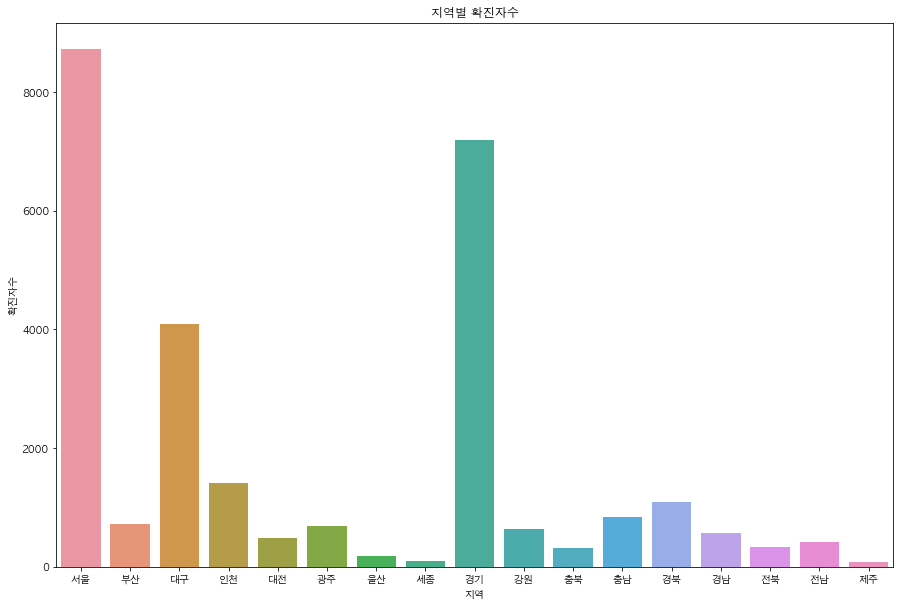

In [123]:
plt.figure(figsize=(15,10))
sns.barplot(data=monthly_coronaT,x=monthly_coronaT.index,y=monthly_coronaT['확진자 수 합계'])
plt.title('지역별 확진자수')
plt.xlabel('지역')
plt.ylabel('확진자수')
plt.show()

In [124]:
monthly_coronaT_sort = monthly_coronaT.sort_values('확진자 수 합계',ascending=False)

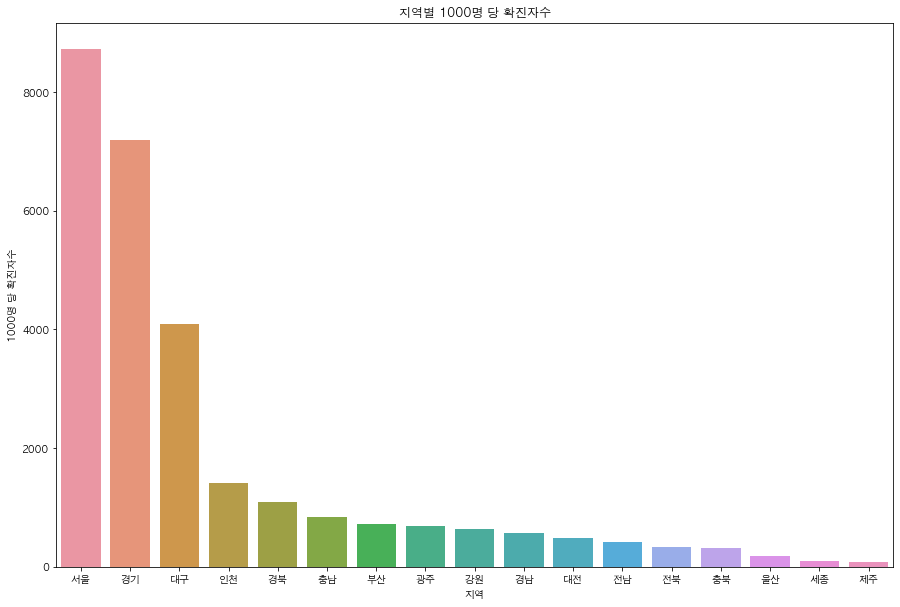

In [125]:
plt.figure(figsize=(15,10))
sns.barplot(data=monthly_coronaT_sort,x=monthly_coronaT_sort.index,y=monthly_coronaT_sort['확진자 수 합계'])
plt.title('지역별 1000명 당 확진자수')
plt.xlabel('지역')
plt.ylabel('1000명 당 확진자수')
plt.show()

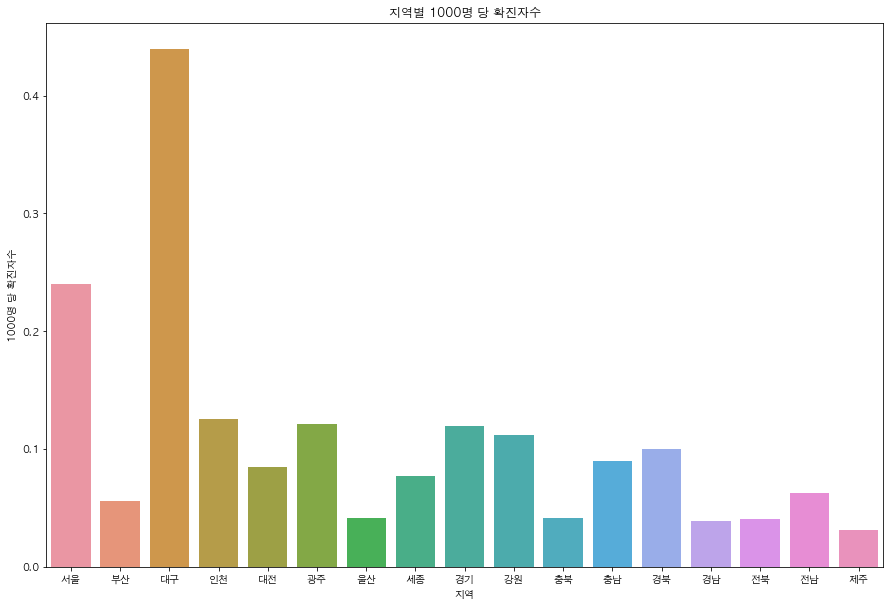

In [126]:
plt.figure(figsize=(15,10))
sns.barplot(data=monthly_coronaT,x=monthly_coronaT.index,y=monthly_coronaT['인구수 당 확진자']*1000)
plt.title('지역별 1000명 당 확진자수')
plt.xlabel('지역')
plt.ylabel('1000명 당 확진자수')
plt.show()

In [127]:
monthly_coronaT_sort2 = monthly_coronaT.sort_values('인구수 당 확진자',ascending=False)

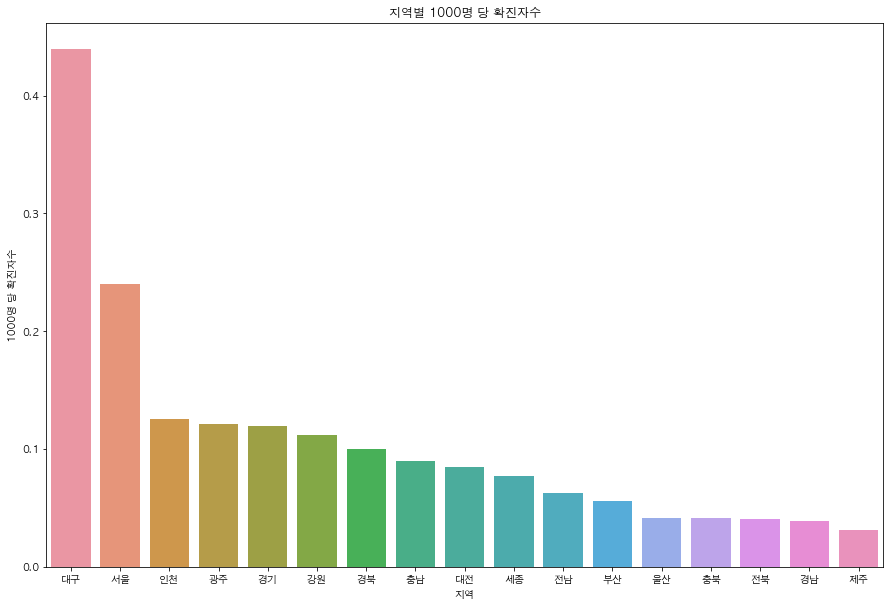

In [128]:
plt.figure(figsize=(15,10))
sns.barplot(data=monthly_coronaT_sort2,x=monthly_coronaT_sort2.index,y=monthly_coronaT_sort2['인구수 당 확진자']*1000)
plt.title('지역별 1000명 당 확진자수')
plt.xlabel('지역')
plt.ylabel('1000명 당 확진자수')
plt.show()

### Folium 지도로 표시하기

In [129]:
monthly_coronaT = monthly_coronaT[['확진자 수 합계','인구수','인구수 당 확진자']]
pop_corona = monthly_coronaT

In [130]:
key_fd = open('../06.RestAPI/kakaomapkey.txt', mode='r')
kmap_key = key_fd.read(100)
key_fd.close()

In [131]:
lat_list, lng_list = [], []
for index, area in enumerate(pop_corona.index):
    addr = area+'시청' if index <= 7 else area+'도청'
    if area == '광주':
        addr = '광주광역시청'
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query='+quote(addr)
    result = requests.get(url,
                          headers={"Authorization": "KakaoAK "+kmap_key}).json()
    lat_list.append(float(result['documents'][0]['y']))
    lng_list.append(float(result['documents'][0]['x']))

In [132]:
pop_corona['위도'] = lat_list
pop_corona['경도'] = lng_list
pop_corona.head()

date,확진자 수 합계,인구수,인구수 당 확진자,위도,경도
서울,8725,36387604,0.000240,37.566824,126.978652
부산,722,12888484,0.000056,35.179737,129.075068
대구,4100,9329996,0.000439,35.871380,128.601805
인천,1405,11198212,0.000125,37.456004,126.705258
대전,481,5680236,0.000085,36.350539,127.384835


In [139]:
pop_corona.rename(index={'date':'지역'},inplace=True)

In [143]:
pop_corona

date,확진자 수 합계,인구수,인구수 당 확진자,위도,경도
서울,8725,36387604,0.000240,37.566824,126.978652
부산,722,12888484,0.000056,35.179737,129.075068
대구,4100,9329996,0.000439,35.871380,128.601805
인천,1405,11198212,0.000125,37.456004,126.705258
대전,481,5680236,0.000085,36.350539,127.384835
광주,685,5639000,0.000121,35.160102,126.851630
울산,181,4334348,0.000042,35.539479,129.311468
세종,99,1285980,0.000077,36.480063,127.289195
경기,7191,60060224,0.000120,37.274977,127.008930
강원,640,5713920,0.000112,37.885326,127.729829


In [140]:
import folium
import json
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np

In [145]:
map = folium.Map(location=[35.9902, 127.054], zoom_start=7, tiles='Stamen Toner')
for i in pop_corona.index:
    folium.CircleMarker(
        location=[pop_corona['위도'][i], pop_corona['경도'][i]],
        radius=pop_corona['확진자 수 합계'][i]/100,
        popup=i,
        tooltip=f"{i}, {pop_corona['확진자 수 합계'][i]}",
        color='#3186cc', fill_color='#3186cc'
    ).add_to(map)
title_html = '<h3 align="center" style="font-size:20px"><b>광역시도별 확진자 수</b></h3>'   
map.get_root().html.add_child(folium.Element(title_html))
map

In [151]:
map = folium.Map(location=[35.9902, 127.054], zoom_start=6)
for i in pop_corona.index:
    folium.CircleMarker(
        location=[pop_corona['위도'][i], pop_corona['경도'][i]],
        radius=pop_corona['인구수 당 확진자'][i]*100000,
        popup=i,
        tooltip=f"{i}, {round(pop_corona['인구수 당 확진자'][i], 2)}",
        color='crimson', fill_color='crimson'
    ).add_to(map)
title_html = '<h3 align="center" style="font-size:20px"><b>광역시도별 인구수당 확진자 수</b></h3>'   
map.get_root().html.add_child(folium.Element(title_html))
map